# Barrio Tortuga SEIR

- Barrio Tortuga SEIR is a toy model to reproduce SEIR equations. 
- In this version the turtles move at random trhough a barrio without streets  
- We first run the model without infection to compute the average number of contacts per tick.
- Then we run SEIR, which consideres four categories: S, E, I and R.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())
import numpy as np
import pandas as pd
import matplotlib

Last updated on  Thu May  7 09:43:06 2020


In [2]:
import os, sys

In [3]:
fontsize=20
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }

plt.rcParams["font.size"     ] = fontsize


In [4]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
from mesa.visualization.TextVisualization import TextVisualization, TextGrid

In [5]:
from termcolor import colored

In [6]:
from turtleWorld.BarrioTortugaSEIR import BarrioTortugaSEIR

In [7]:
from turtleWorld.utils import PrtLvl, print_level, get_files

In [8]:
from turtleWorld.analysis import peak_position, r0, r0_series

In [9]:
from turtleWorld.analysis import plot_average_I, plot_runs_I, plot_I_E, plot_S_R, plot_compar_I

# New analysis

In [10]:
path = "/Users/jjgomezcadenas/Projects/Development/turtleWorld/data"
mdir = "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F"
mpath = os.path.join(path, mdir)

In [11]:
mpath

'/Users/jjgomezcadenas/Projects/Development/turtleWorld/data/Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F'

In [12]:
DFD, FND = get_files(path=path, mdir = mdir)

In [13]:
DFD['STA'].head()

,Unnamed: 0,Ti,Tr,P
0,0,5.5,6.5,0.001915
1,1,5.5,6.5,0.001915
2,2,5.5,6.5,0.001915
3,3,5.5,6.5,0.001915
4,4,5.5,6.5,0.001915


In [14]:
FND

{'DFT_run_1': '/Users/jjgomezcadenas/Projects/Development/turtleWorld/data/Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F/DFT_run_1.csv',
 'DFT_run_0': '/Users/jjgomezcadenas/Projects/Development/turtleWorld/data/Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F/DFT_run_0.csv',
 'STA': '/Users/jjgomezcadenas/Projects/Development/turtleWorld/data/Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F/STA.csv',
 'DFT_run_average': '/Users/jjgomezcadenas/Projects/Development/turtleWorld/data/Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F/DFT_run_average.csv'}

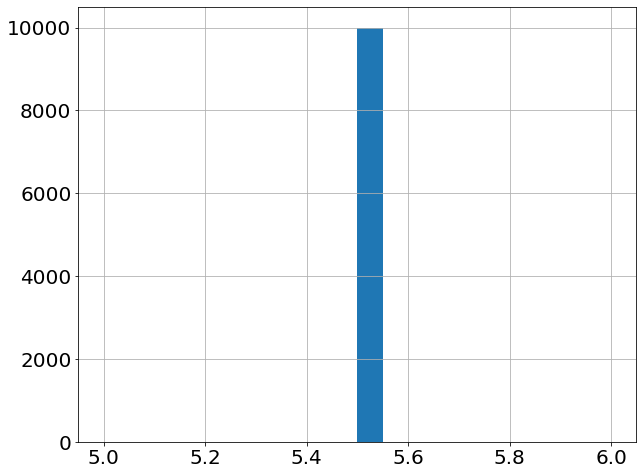

In [15]:
df = DFD['STA']
hist = df.Ti.hist(bins=20)

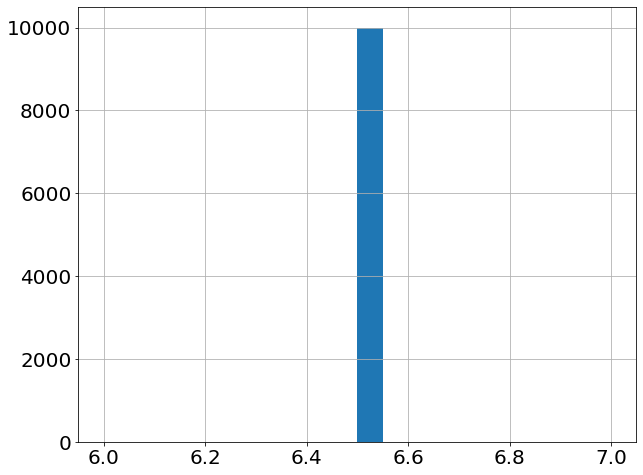

In [16]:
hist = df.Tr.hist(bins=20)

In [17]:
df.Ti.mean()

5.5

In [18]:
df.Tr.mean()

6.5

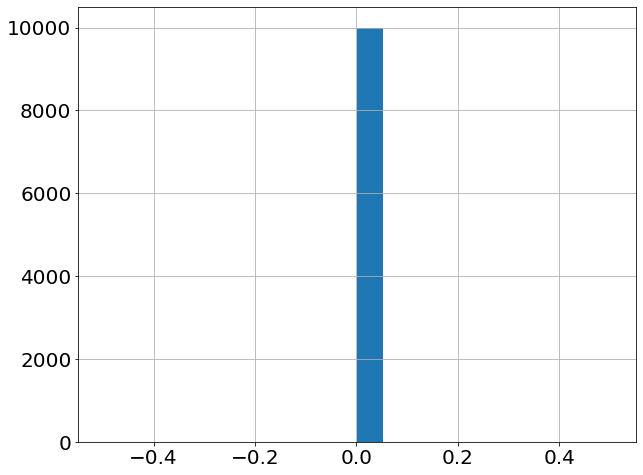

In [19]:
hist = df.P.hist(bins=20)

In [20]:
df.P.mean()

0.0019145299145299148

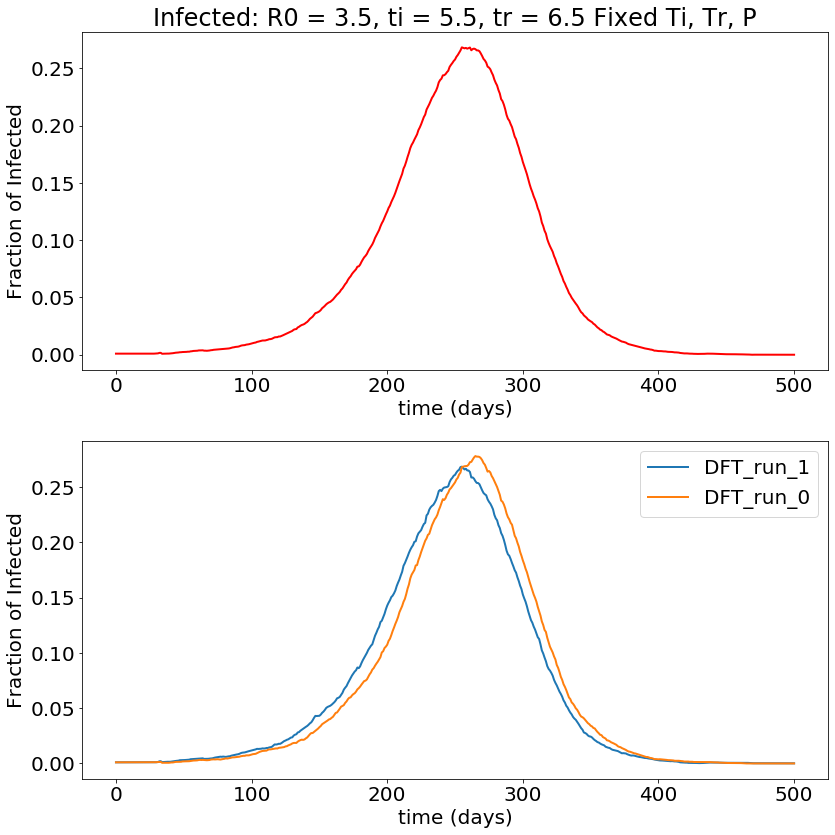

In [21]:
plot_runs_I(DFD, T='Infected: R0 = 3.5, ti = 5.5, tr = 6.5 Fixed Ti, Tr, P', figsize=(12,12))

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([2.57767932, 2.7543162 , 2.93095307, 3.10758995, 3.28422683,
        3.4608637 , 3.63750058, 3.81413745, 3.99077433, 4.16741121,
        4.34404808]),
 <a list of 10 Patch objects>)

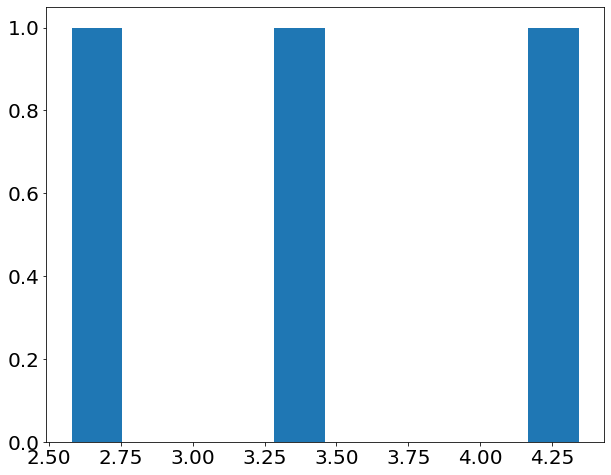

In [22]:
T, R0, aR0 = r0_series(DFD, tmax=25, tr=6.5, ticks_per_day=5)
dfR0 = pd.Series(aR0)
plt.hist(dfR0.values)

## Exponential

In [23]:
DFD, FND = get_files(path=path, mdir = "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_E_Tir_E_Pdist_F")

(array([1.17160117e-01, 4.65459826e-02, 1.86765755e-02, 7.05947402e-03,
        2.73457648e-03, 9.69707970e-04, 5.62430623e-04, 7.75766376e-05,
        9.69707970e-05, 5.81824782e-05]),
 array([4.17116965e-04, 5.15660863e+00, 1.03128001e+01, 1.54689916e+01,
        2.06251832e+01, 2.57813747e+01, 3.09375662e+01, 3.60937577e+01,
        4.12499492e+01, 4.64061407e+01, 5.15623322e+01]),
 <a list of 1 Patch objects>)

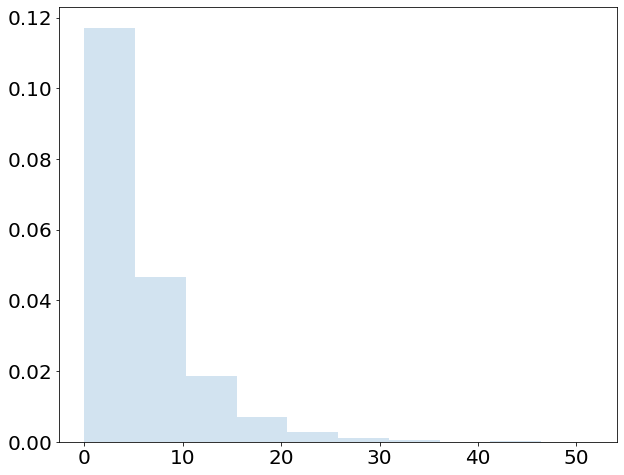

In [24]:
df = DFD['STA']
plt.hist(df.Ti.values, density=True, histtype='stepfilled', alpha=0.2)

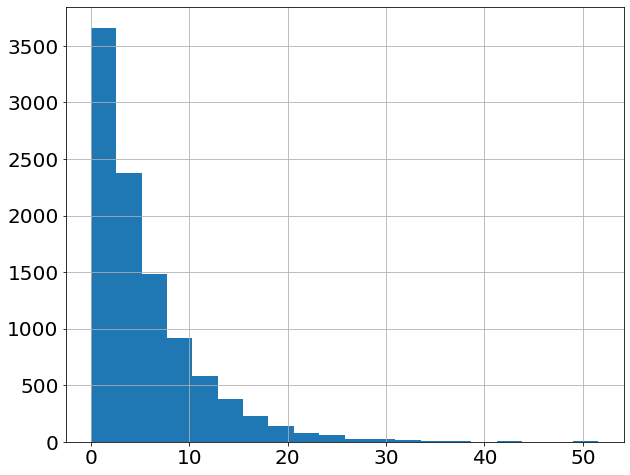

In [25]:
df = DFD['STA']
hist = df.Ti.hist(bins=20)

In [26]:
df.Ti.mean()

5.544450221722217

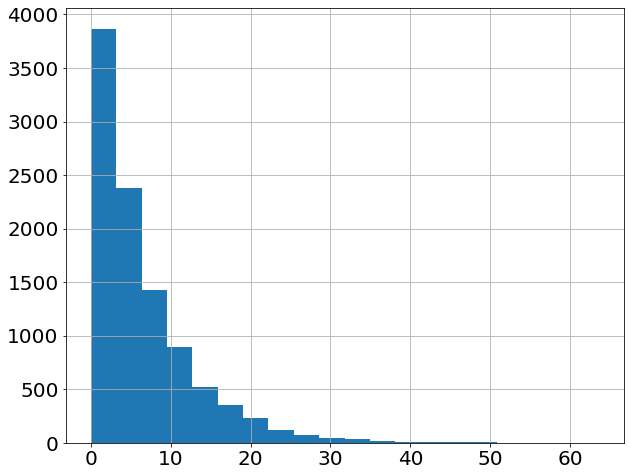

In [27]:
hist = df.Tr.hist(bins=20)

In [28]:
df.Tr.mean()

6.537495560533574

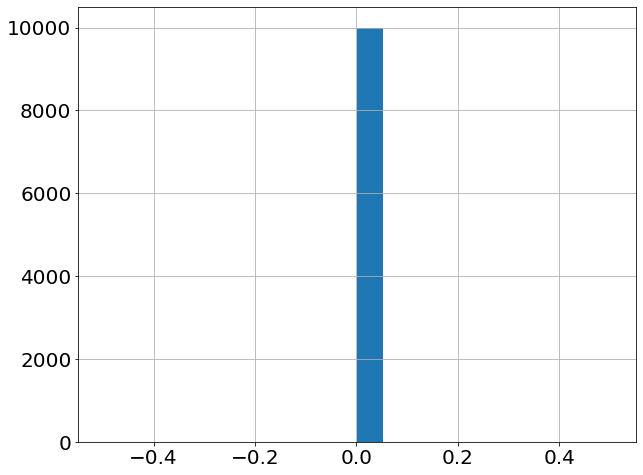

In [29]:
hist = df.P.hist(bins=20)

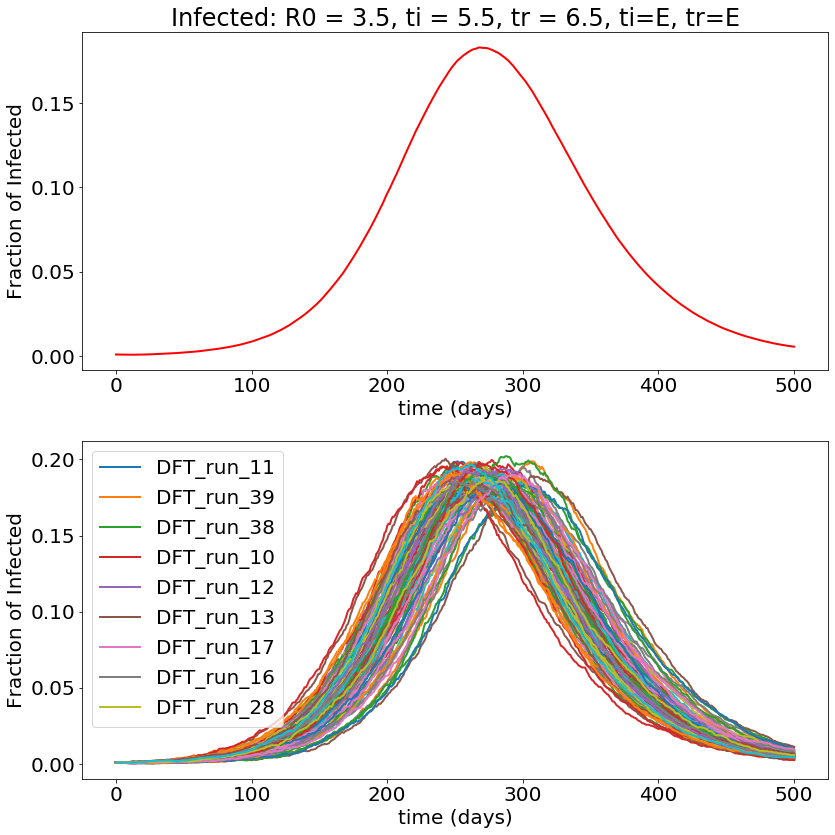

In [30]:
plot_runs_I(DFD, T='Infected: R0 = 3.5, ti = 5.5, tr = 6.5, ti=E, tr=E', figsize=(12,12))

In [31]:
T, R0, aR0 = r0_series(DFD, tmax=25, tr=6.5, ticks_per_day=5)

In [32]:
dfR0 = pd.Series(aR0)

In [33]:
dfR0.head()

DFT_run_11    2.029774
DFT_run_39    0.949166
DFT_run_38    2.331431
DFT_run_10    1.581726
DFT_run_12    2.673674
dtype: float64

(array([ 3.,  4., 11., 18., 21., 19., 14.,  6.,  4.,  1.]),
 array([0.91152748, 1.2346943 , 1.55786111, 1.88102792, 2.20419473,
        2.52736155, 2.85052836, 3.17369517, 3.49686199, 3.8200288 ,
        4.14319561]),
 <a list of 10 Patch objects>)

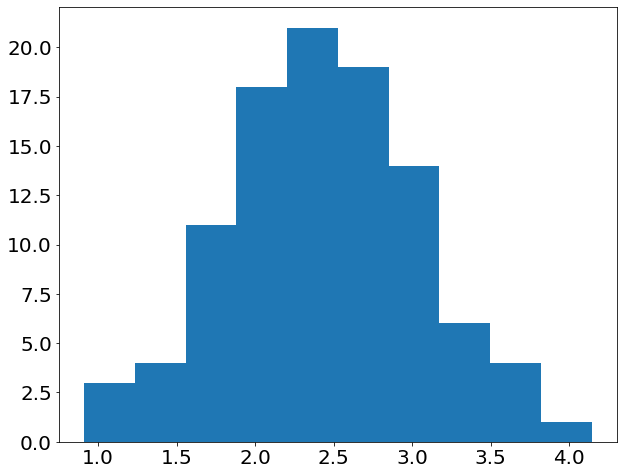

In [34]:
plt.hist(dfR0.values)

## Ti = Gamma, Tr = Gamma 

In [35]:
DFD, FND = get_files(path=path, mdir = "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_G_Tir_G_Pdist_F")

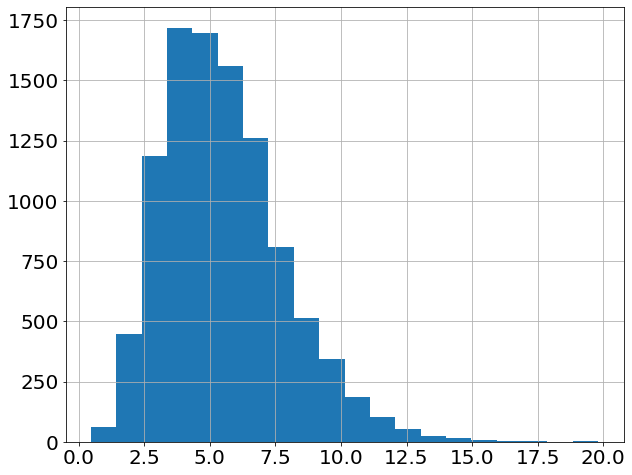

In [36]:
df = DFD['STA']
hist = df.Ti.hist(bins=20)

In [37]:
df.Ti.mean()

5.539871105722923

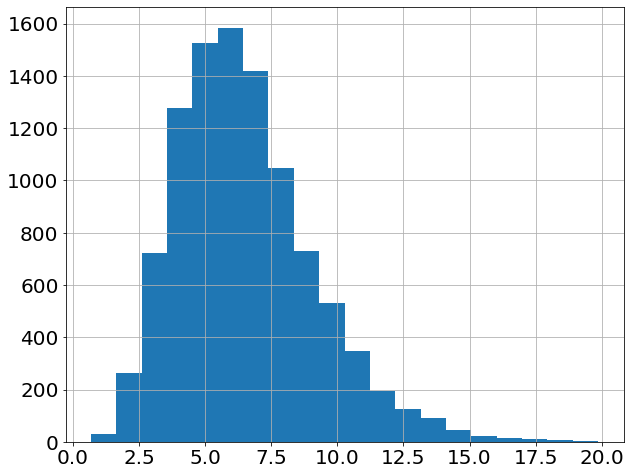

In [38]:
hist = df.Tr.hist(bins=20)

In [39]:
df.Tr.mean()

6.5137769752395105

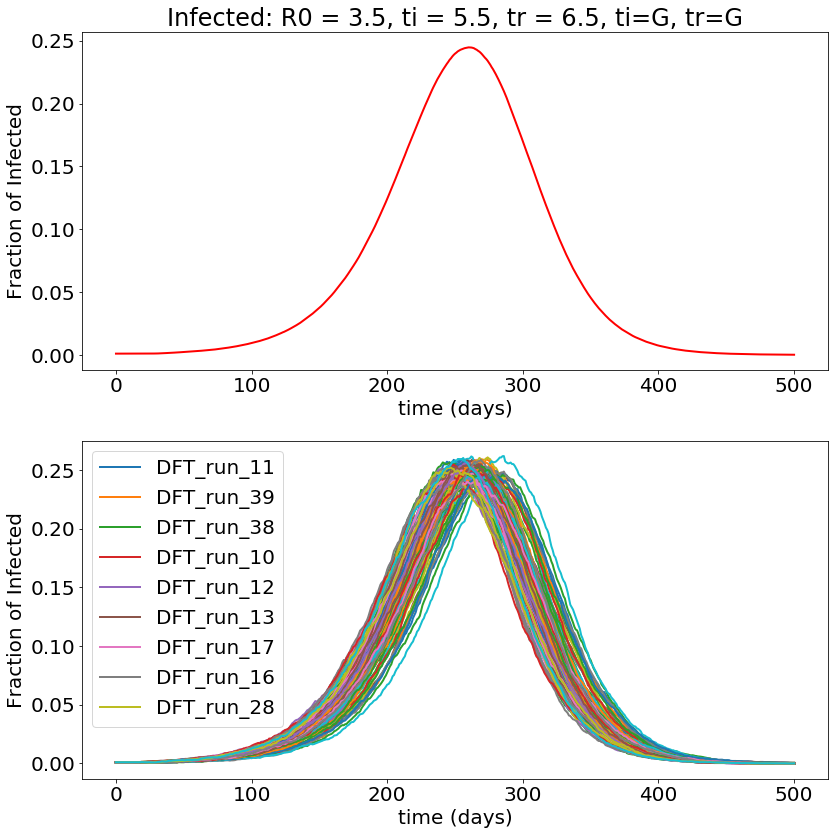

In [40]:
plot_runs_I(DFD, T='Infected: R0 = 3.5, ti = 5.5, tr = 6.5, ti=G, tr=G', figsize=(12,12))

In [41]:
T, R0, aR0 = r0_series(DFD, tmax=25, tr=6.5, ticks_per_day=5)

In [42]:
dfR0 = pd.Series(aR0)

(array([ 4.,  8., 16., 13., 18., 10., 20.,  6.,  2.,  4.]),
 array([1.68945391, 1.98089051, 2.27232711, 2.56376371, 2.85520031,
        3.14663691, 3.43807351, 3.72951011, 4.02094671, 4.31238331,
        4.60381991]),
 <a list of 10 Patch objects>)

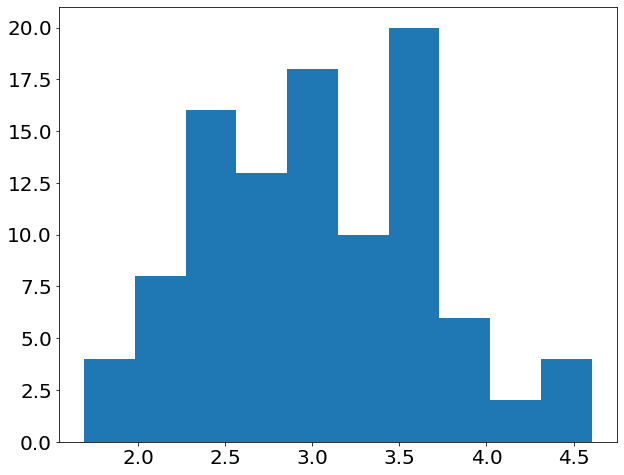

In [43]:
plt.hist(dfR0.values)

## R0 Poisson

In [44]:
DFD, FND = get_files(path=path, mdir = "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_P")

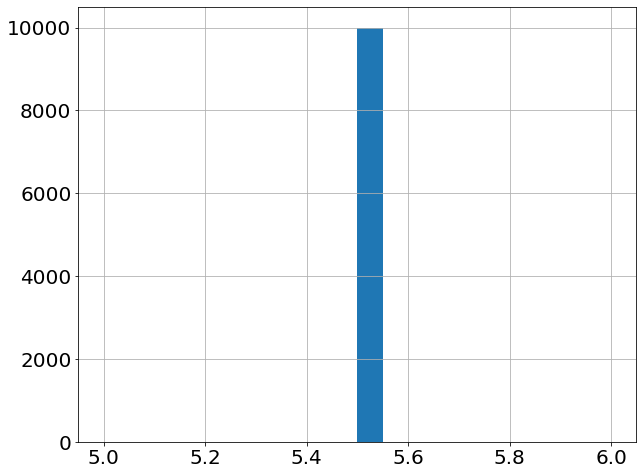

In [45]:
df = DFD['STA']
hist = df.Ti.hist(bins=20)

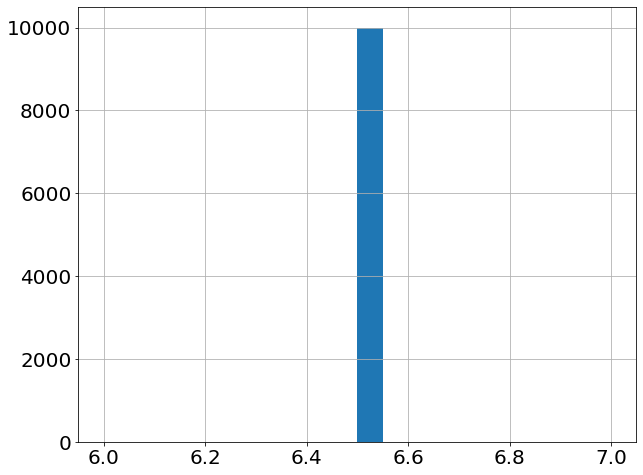

In [46]:
hist = df.Tr.hist(bins=20)

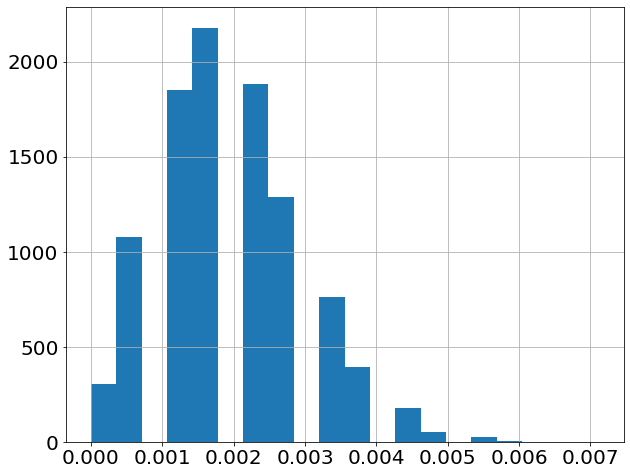

In [47]:
hist = df.P.hist(bins=20)

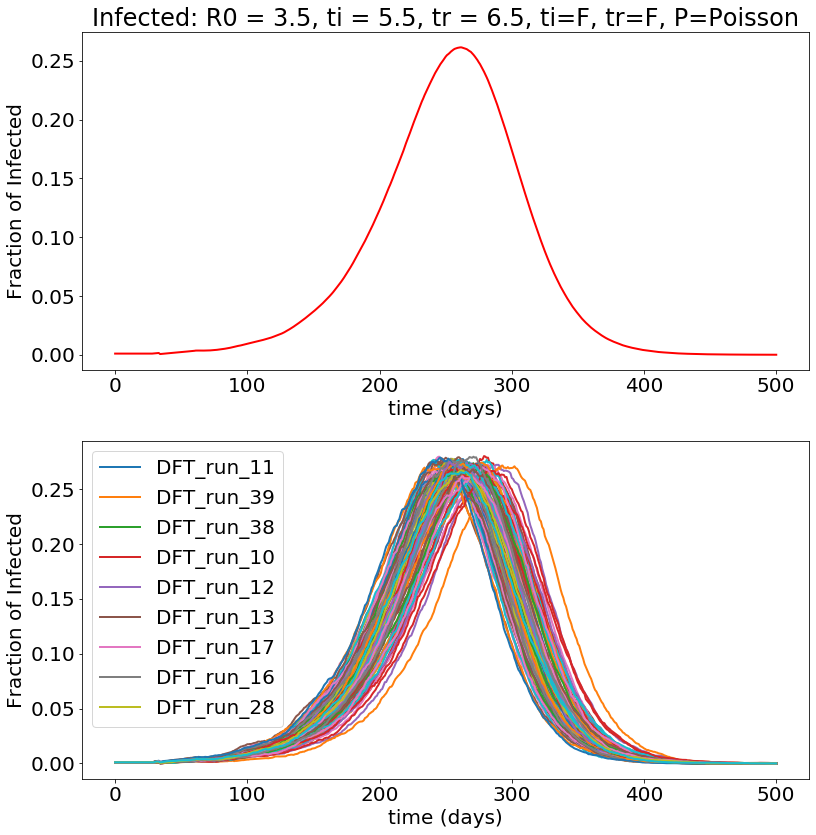

In [48]:
plot_runs_I(DFD, T='Infected: R0 = 3.5, ti = 5.5, tr = 6.5, ti=F, tr=F, P=Poisson', figsize=(12,12))

## Negative binomial

In [49]:
DFD, FND = get_files(path=path, mdir = "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_S")

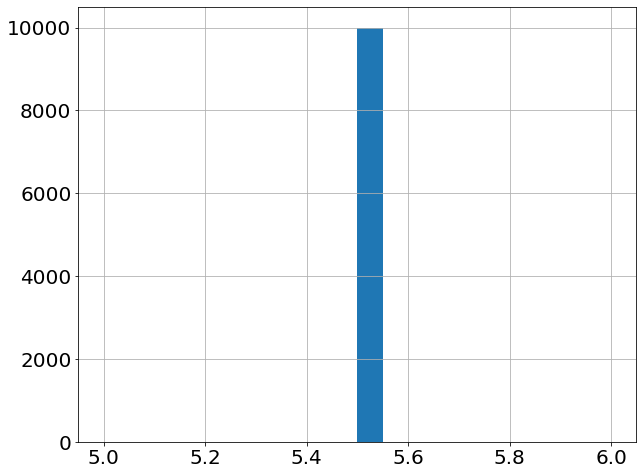

In [50]:
df = DFD['STA']
hist = df.Ti.hist(bins=20)

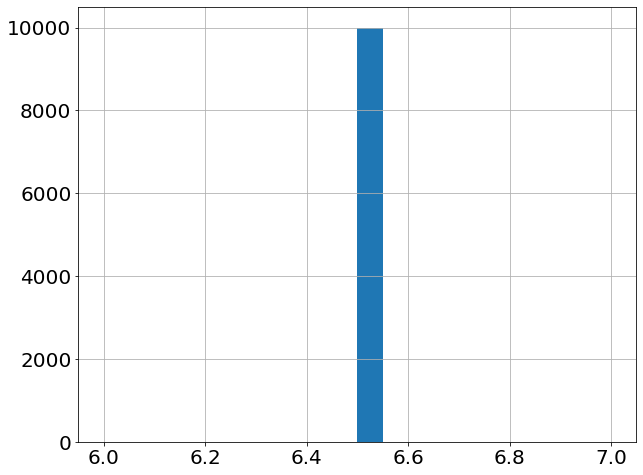

In [51]:
hist = df.Tr.hist(bins=20)

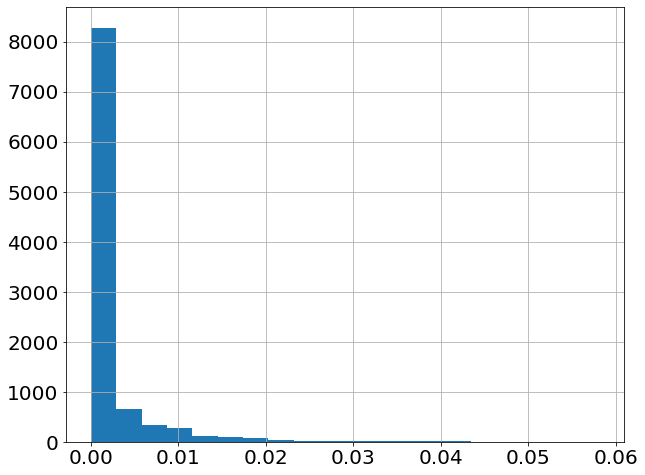

In [52]:
hist = df.P.hist(bins=20)

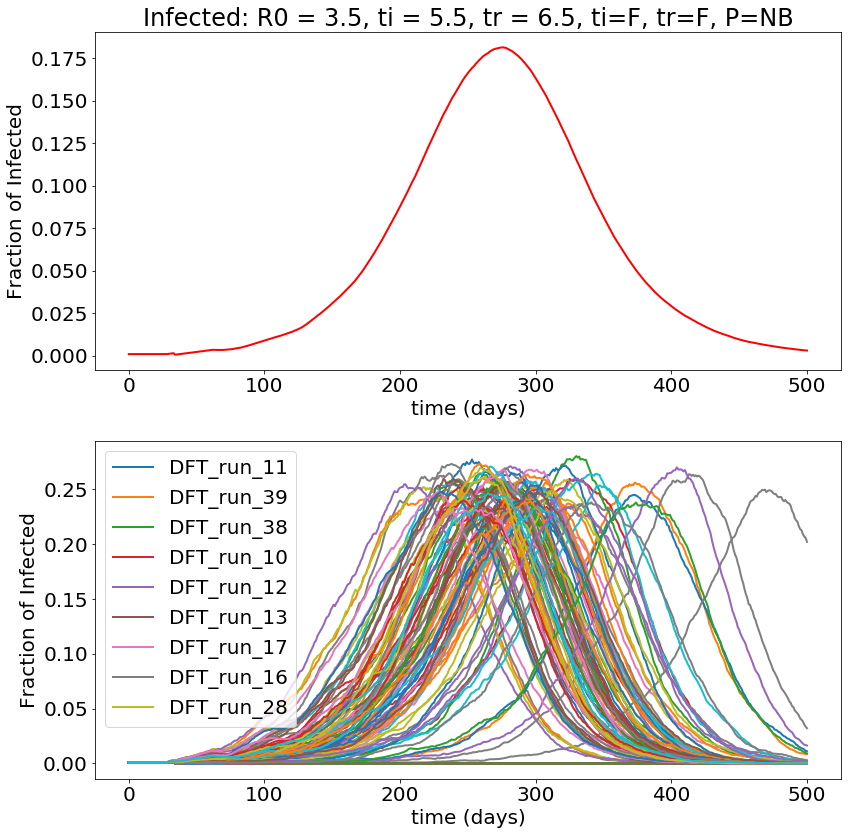

In [53]:
plot_runs_I(DFD, T='Infected: R0 = 3.5, ti = 5.5, tr = 6.5, ti=F, tr=F, P=NB', figsize=(12,12))

In [54]:
T, R0, aR0 = r0_series(DFD, tmax=25, tr=6.5, ticks_per_day=5)

In [55]:
dfR0 = pd.Series(aR0)

(array([24., 22., 20., 12.,  9.,  4.,  3.,  1.,  1.,  5.]),
 array([ 0.        ,  1.21151353,  2.42302705,  3.63454058,  4.84605411,
         6.05756764,  7.26908116,  8.48059469,  9.69210822, 10.90362175,
        12.11513527]),
 <a list of 10 Patch objects>)

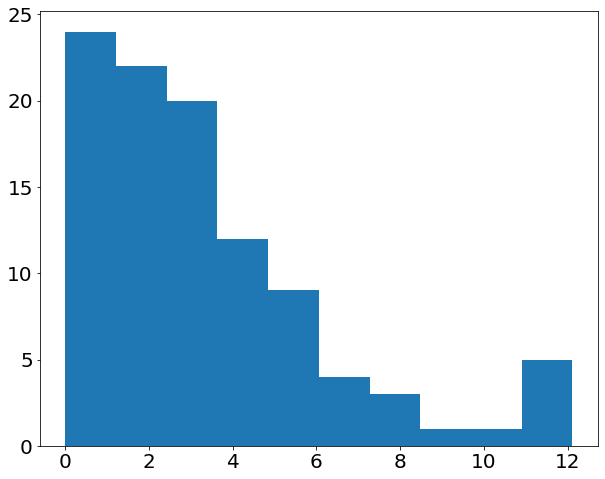

In [56]:
plt.hist(dfR0.values)

# Larger run, 20,000 Turtles, 1000 steps

In [57]:
DFD, FND = get_files(path=path, mdir = "Turtles_20000_steps_1000_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_S")

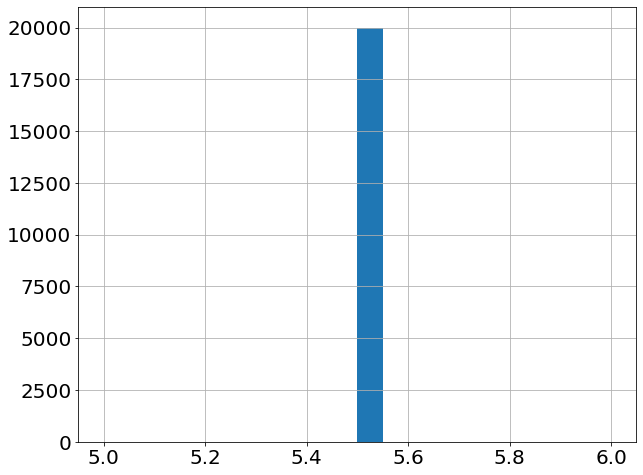

In [58]:
df = DFD['STA']
hist = df.Ti.hist(bins=20)

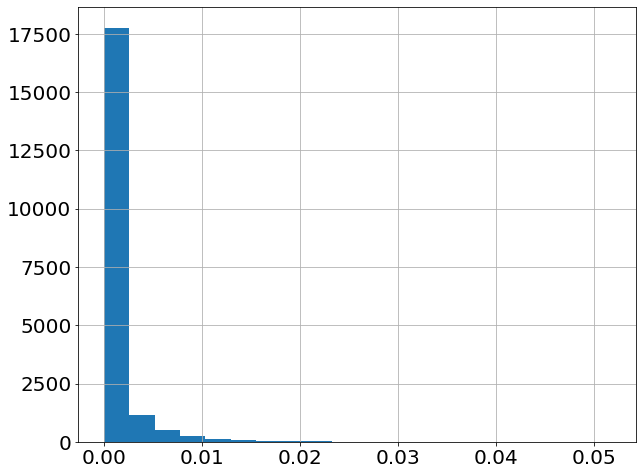

In [59]:
hist = df.P.hist(bins=20)

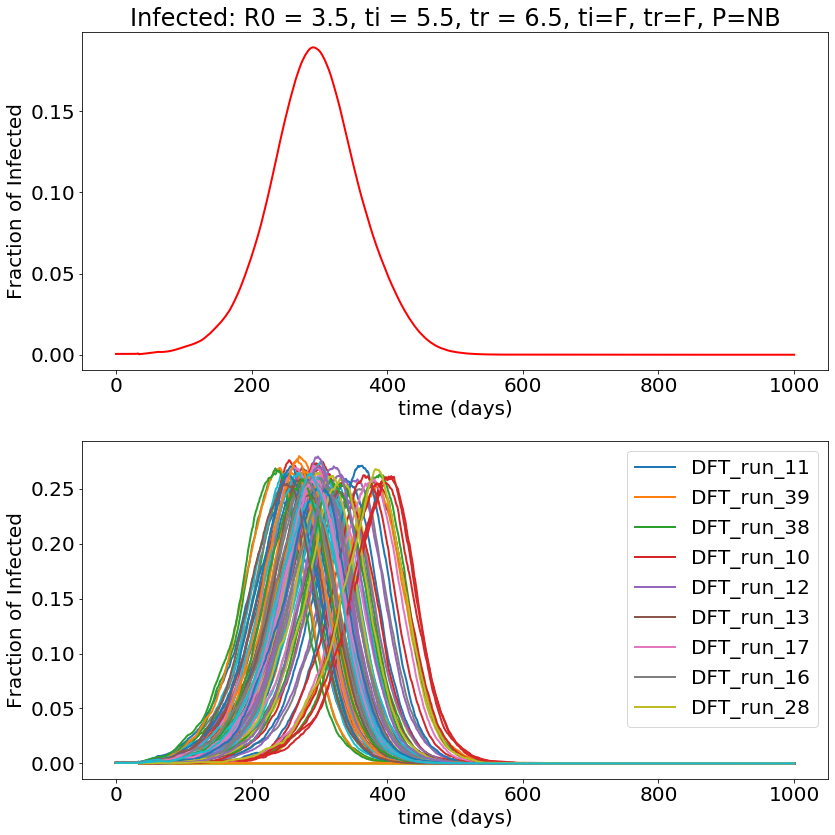

In [60]:
plot_runs_I(DFD, T='Infected: R0 = 3.5, ti = 5.5, tr = 6.5, ti=F, tr=F, P=NB', figsize=(12,12))

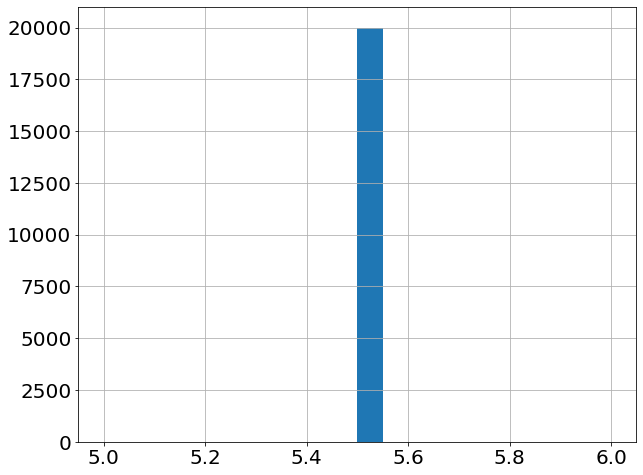

In [61]:
df = DFD['STA']
hist = df.Ti.hist(bins=20)

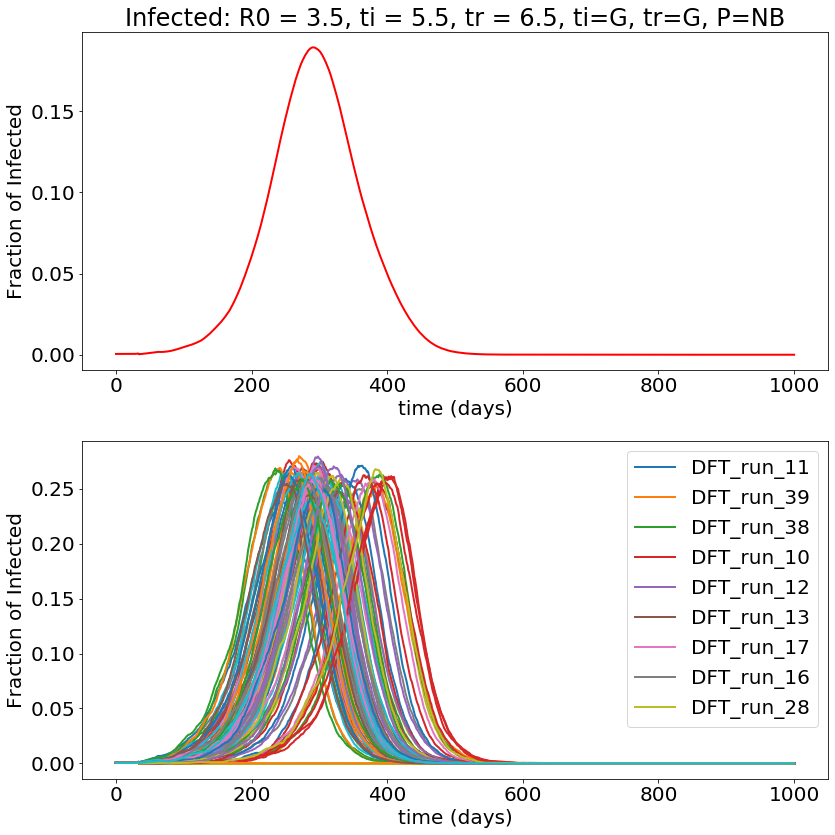

In [62]:
plot_runs_I(DFD, T='Infected: R0 = 3.5, ti = 5.5, tr = 6.5, ti=G, tr=G, P=NB', figsize=(12,12))

In [63]:
DIRS = ["Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F", 
    "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_S",
     "Turtles_20000_steps_1000_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_S",
    "Turtles_20000_steps_1000_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_G_Tir_G_Pdist_S",
    ]
LBLS =['Tid_F_Tir_F_Pdist_F','Tid_F_Tir_F_Pdist_S', 'Tid_F_Tir_F_Pdist_S','Tid_G_Tir_G_Pdist_S']

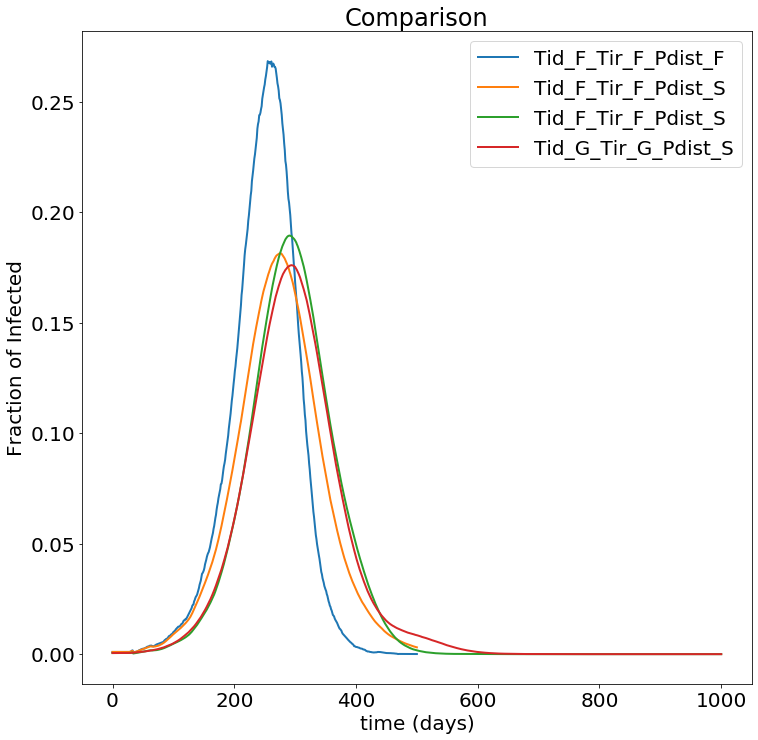

In [64]:
plot_compar_I(path, DIRS, LBLS, T='Comparison', figsize=(12,12))

In [65]:
DIRS = ["Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F", 
    "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_E_Tir_E_Pdist_F",
     "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_G_Tir_G_Pdist_F",
     "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_P",
     "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_S"
    ]
LBLS =['Ti_F, Tr_F, P_F','Ti_E, Tr_E, P_F', 'Ti_G, Tr_G, P_F', 'Ti_F, Tr_F, P_P','Ti_F, Tr_F, P_NB']

In [66]:
DIRS = ["Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F", 
    "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_E_Tir_E_Pdist_F",
     "Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_G_Tir_G_Pdist_F"
    ]
LBLS =['Ti_F, Tr_F, P_F','Ti_E, Tr_E, P_F', 'Ti_G, Tr_G, P_F']

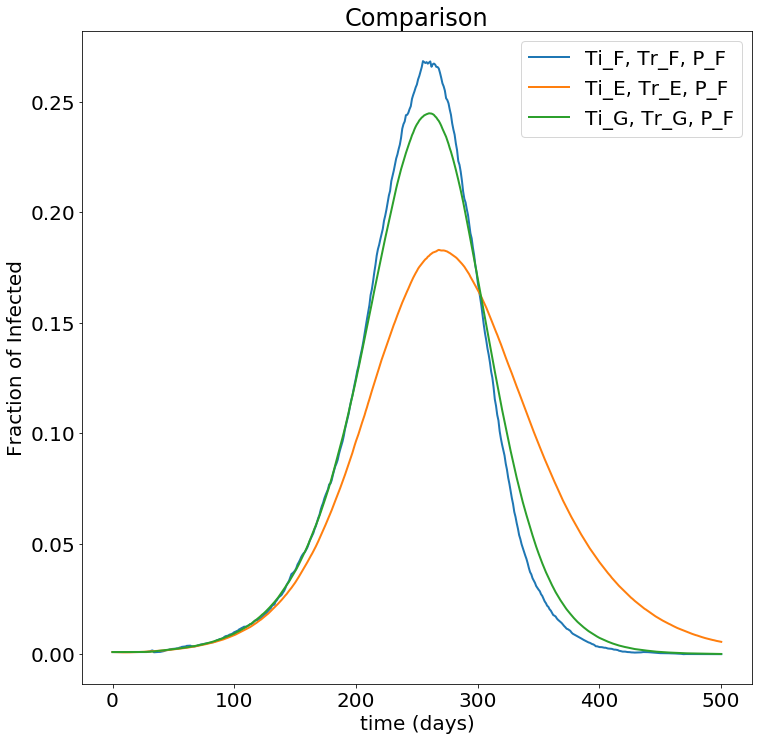

In [67]:
plot_compar_I(path, DIRS, LBLS, T='Comparison', figsize=(12,12))

# ER network

In [68]:
DFD, FND = get_files(path=path, mdir = "NxTurtles_20000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F")

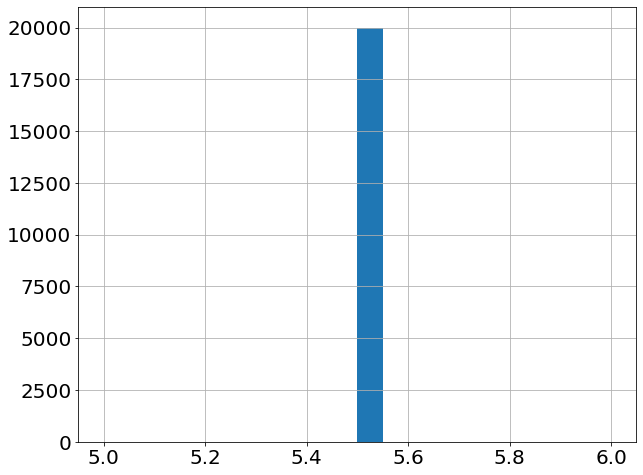

In [69]:
df = DFD['STA']
hist = df.Ti.hist(bins=20)

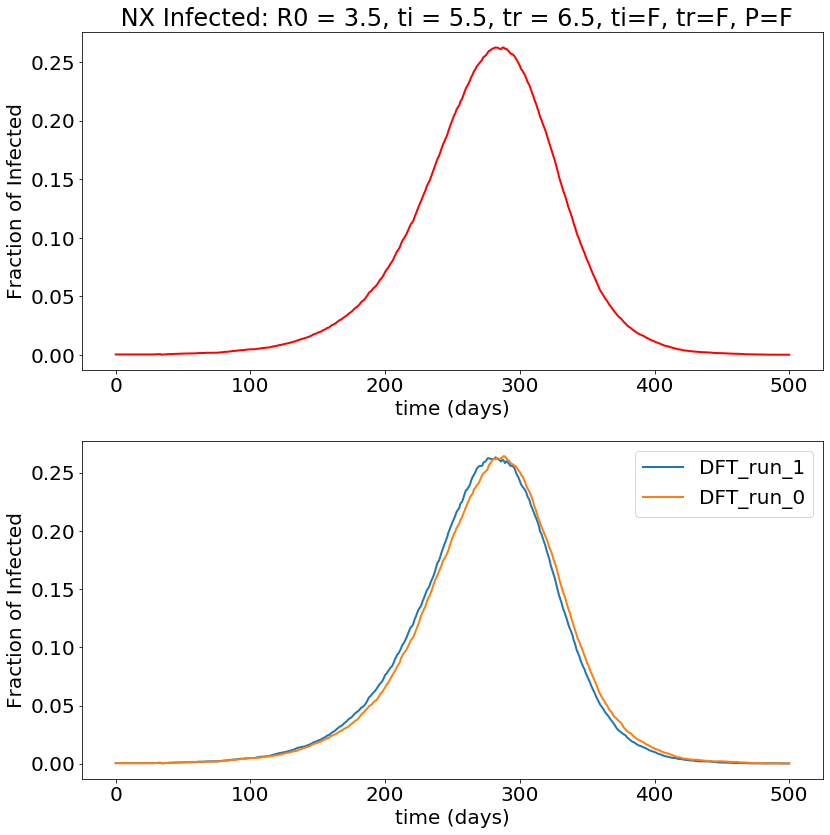

In [70]:
plot_runs_I(DFD, T=' NX Infected: R0 = 3.5, ti = 5.5, tr = 6.5, ti=F, tr=F, P=F', figsize=(12,12))

In [71]:
DIRS = ["Turtles_10000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F", 
    "NxTurtles_20000_steps_500_i0_10_r0_3.5_ti_5.5_tr_6.5_Tid_F_Tir_F_Pdist_F"
    ]
LBLS =['Tid_F_Tir_F_Pdist_F','NX-Tid_F_Tir_F_Pdist_F']